<a href="https://colab.research.google.com/github/mkkim007/AIFFEL/blob/main/%5BE_05%5DFaceNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [E-05] ÎÇòÎûë ÎãÆÏùÄ Ïó∞ÏòàÏù∏ÏùÄ ÎàÑÍµ¨?

ÏûÑÎ≤†Îî© : Í≥†Ï∞®ÏõêÏùò Ï†ïÎ≥¥Î•º Ï†ÄÏ∞®ÏõêÏúºÎ°ú Î≥ÄÌôòÌïòÎ©¥ÏÑú ÌïÑÏöîÌïú Ï†ïÎ≥¥Î•º Î≥¥Ï†ÑÌïòÎäî Í≤É

In [2]:
!pip install face_recognition

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100.1 MB 7.8 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=99c3dbce6e0718539163e9877ed55cbf07c48dce9c315fe7812c6c17b3f42e06
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


matplotlib Ìè∞Ìä∏ ->Í∏ÄÍº¥ Íπ®Ïßê Î¨∏Ï†ú Ìï¥Í≤∞

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,158 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [1]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import dlib
import face_recognition
import os
%matplotlib inline
import cv2
import matplotlib 
matplotlib.font_manager._rebuild()  #Thanks to ÌòïÏ§Ä

## 1.ÏÇ¨ÏßÑ Î™®ÏúºÍ∏∞

Íµ¨Í∏Ä ÎìúÎùºÏù¥Î∏å ÎßàÏö¥Ìä∏ÌïòÍ∏∞

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### 1.1 ÎÇòÏùò ÏÇ¨ÏßÑ..„Öé

ÏúàÎèÑÏö∞ÏóêÏÑú ÌïúÍ∏ÄÌååÏùºÎ™ÖÏùÑ Í∞ÄÏßÑ ÌååÏùºÏùÑ zipÏúºÎ°ú ÏïïÏ∂ïÌïú ÌõÑÏóê Î¶¨ÎàÖÏä§ÏóêÏÑú ÌíÄÎ©¥ ÌååÏùºÎ™ÖÏù¥ Íπ®ÏßÄÎäî ÌòÑÏÉÅÏù¥ Î∞úÏÉùÌïúÎã§. Ïù¥Îäî zipÌååÏùºÏùÄ Ïú†ÎãàÏΩîÎìúÎ°ú Ï†ÄÏû•ÌïòÏßÄ ÏïäÍ∏∞ÎïåÎ¨∏Ïù¥Îã§. Í∑∏Îü¥ ÎïåÎäî  '-O cp949' ÏòµÏÖòÏùÑ ÎÑ£Ïñ¥Ï£ºÎ©¥ Ìï¥Í≤∞ Ìï† Ïàò ÏûàÎã§!

In [3]:
!mkdir images

!unzip -qq -O cp949 /content/gdrive/MyDrive/Data/me.zip -d /content/images

### 1.2 Ïó∞ÏòàÏù∏ ÏÇ¨ÏßÑ

In [4]:
!tar Jxvf /content/gdrive/MyDrive/Data/celebrity.tar.xz
!cp -r /content/celebrity/* /content/images

celebrity/
celebrity/Ïú§Í∑†ÏÉÅ.jpg
celebrity/Ïù¥Ï¢ÖÏÑù.jpeg
celebrity/Î∞ïÌï¥Ïùº.jpeg
celebrity/Ïù¥ÏäπÏ≤†.jpeg
celebrity/Ïú§Ï¢ÖÏã†.jpeg
celebrity/ÏÜ°Ï§ëÍ∏∞.jpeg
celebrity/Ïù¥ÎØºÌò∏.jpeg
celebrity/ÍπÄÎûòÏõê.jpeg
celebrity/Ï†ïÏö∞ÏÑ±.jpeg
celebrity/Ïù¥Ìù¨Ï§Ä.jpg
celebrity/Ïù¥ÏÑ±ÎØº.jpg
celebrity/Î•òÏäπÎ≤î.jpg
celebrity/ÌïúÏÑùÍ∑ú.jpg
celebrity/Î∞ïÏ†ïÎØº.jpg
celebrity/Ï°∞Ï†ïÏÑù.jpg
celebrity/Ïù¥ÎåÄÌòï.jpg
celebrity/Ïã¨ÏàòÏ∞Ω.jpeg
celebrity/Ï°∞Ïù∏ÏÑ±.jpg
celebrity/Ïù¥Í¥ëÏàò.jpg
celebrity/ÌïúÍ∏∞Î≤î.jpg
celebrity/ÌïòÏäπÏßÑ.jpg
celebrity/ÏÑúÏû•Ìõà.jpg
celebrity/ÍπÄÌù¨Ï≤†.jpg
celebrity/ÍπÄÍµ¨Îùº.jpg
celebrity/ÏûáÏÑ≠.png
celebrity/ÎîïÌóåÌÑ∞.jpeg
celebrity/ÏòÅÏïåÎÇ®.png
celebrity/ÍπÄÍ≤ΩÏßÑ.png
celebrity/Î∞ïÌúòÏàú.jpg
celebrity/Î∞ïÌù¨Ïàú.jpg
celebrity/ÌÉùÏó∞.jpg
celebrity/ÌïòÌòÑÏö∞.jpg
celebrity/ÍπÄÏó∞Ïö∞.jpeg
celebrity/Ïú†Ìù¨Ïó¥.jpeg
celebrity/Ïã†ÎèôÏóΩ.jpg
celebrity/ÏÑ±ÏãúÍ≤Ω.jpg
celebrity/ÎßàÎèôÏÑù.jpeg
celebrity/Ï°∞Ï†ïÏπò.jpg
celebrity/Ìô©Ï†ïÎØº.jpg
celebrity/Í≥ΩÎèÑÏõê.jpg
celebrity/Î∞ïÏ∞¨Ïö±.jp

file_list: ['Í∞úÏΩî.jpeg', 'ÌÅ¨Î¶¨Ïä§ÌÉà.jpg', 'Í∂åÌÉúÏõê.jpeg', 'Ïù¥Î≤îÏàò.jpeg', 'ÏßÑ.jpg', 'Ïò§Ïû¨Ïõê.jpg', 'Í≥†Ï∞ΩÏÑù.jpeg', 'ÎßàÌÅ¨ Îü¨ÌåîÎ°ú.jpeg', 'ÎÇò3.jpg', 'ÌïòÌòÑÏö∞.jpg', 'Ï°∞Ï†ïÏπò.jpg', 'ÏÑ∏Ìõà.jpg', 'Ïû≠ Î∏îÎûô.jpeg', 'Ïú†Î¶¨.jpg', 'ÌÅ¨Î¶¨Ïä§ ÌñÑÏä§ÏõåÏä§.jpg', 'Î•òÏäπÎ≤î.jpg', 'Ïû≠ Í∞§Î¶¨ÌçºÎÇ¥ÌÇ§Ïä§.jpg', 'Î∞ïÏ∞¨Ïö±.jpeg', 'Ïù¥Ï¢ÖÏÑù.jpeg', 'Ïû•ÎèôÍ±¥.jpeg', 'Ïù¥ÏäπÏ≤†.jpeg', 'ÎåÄÎèÑÏÑúÍ¥Ä.jpeg', 'Ïú§Í∑†ÏÉÅ.jpg', 'Î¶¨ÏïÑ.jpg', 'Ïï§ÎìúÎ•ò Ïùë.png', 'Ïú§Ï¢ÖÏã†.jpeg', 'ÏÇ¨Î¨¥Ïóò L Ïû≠Ïä®.jpg', 'ÍπÄÏú§ÏÑù.jpeg', 'Ï†úÌîÑÎ¶¨ ÌûåÌÑ¥.jpg', 'ÍπÄÍ¥ëÌòÑ.jpg', 'ÏïÑÏù¥Ïú†.jpg', 'Ï†úÏù¥ÏΩ• Î∞∞ÌÑ∏Î°†.jpg', 'Ï§ÑÎ¶¨ÏóîÍ∞ï.png', 'ÏäàÍ∞Ä.jpg', 'ÎØ∏ÎØ∏.jpg', 'ÏäπÌù¨.jpeg', 'Ïú†ÏïÑ.jpg', 'Î∞±Ïú§Ïãù.png', 'ÎîîÏò§.jpeg', 'Ïú†ÎÖ∏Ïú§Ìò∏.jpg', 'Î∞ïÍ±¥Ïö∞.png', 'Ïú†Ìï¥ÏßÑ.jpg', 'Ïú§Í≤ΩÏã†.jpg', 'Ïä¨Î¶¨Ìîº.jpg', 'ÌïúÌö®Ï£º.jpg', 'Î¨∏Î≥Ñ.jpg', 'ÍπÄÌù¨Ï≤†.jpg', 'ÏµúÎ¨¥ÏÑ±.jpg', 'ÍπÄÍ≥†ÏùÄ.jpeg', 'ÏßÄÎîî.jpg', 'Î∑î.png', 'Ï°∞Ïù∏ÏÑ±.jpg', 'Ìä∏ÏôÄÏù¥Ïä§Ï†ïÏó∞.jpg', 'Í∞úÎ¶¨.jpg', 'ÍπÄÏú†Ï†ï.jpg', 'Ïù¥Ï

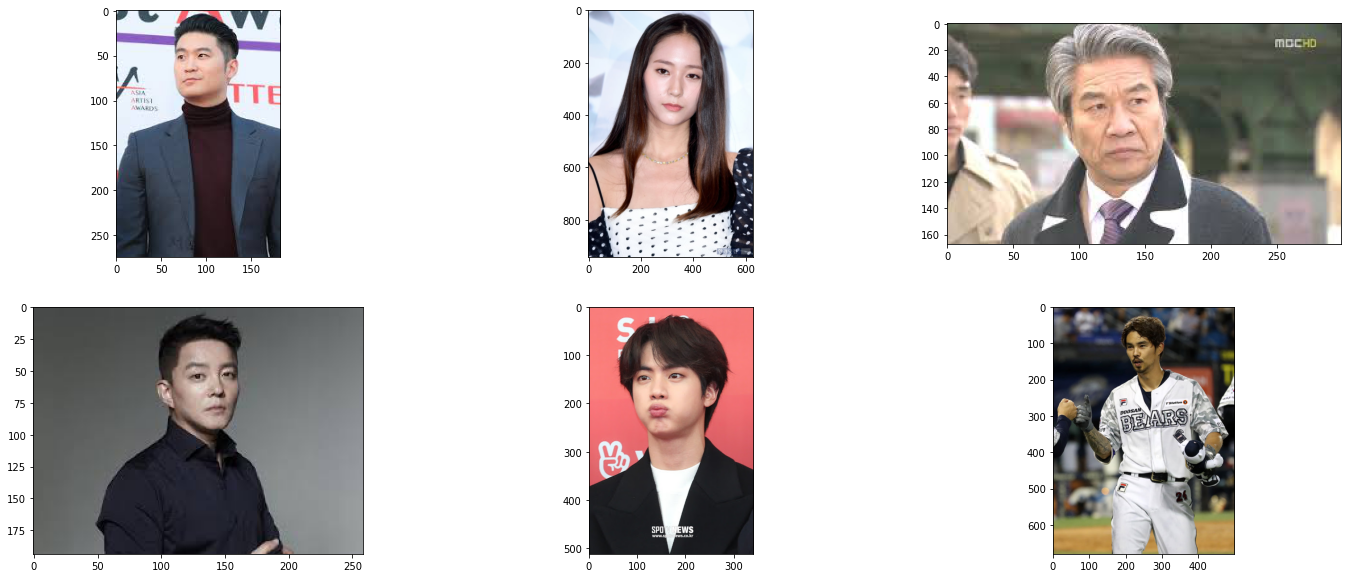

In [5]:
dir_path = "/content/images"
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))


#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

## 2.ÏñºÍµ¥ ÏòÅÏó≠ ÏûêÎ•¥Í∏∞

In [6]:
!mkdir cropped_images

In [7]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image) # Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏñºÍµ¥ ÏòÅÏó≠Ïùò Ï¢åÌëú
    if face_locations == [] : return []     # ÏñºÍµ¥ Í≤ÄÏ∂úÏù¥ ÏïàÎêòÎäî Í≤ΩÏö∞ [] 
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

In [8]:
image_path = dir_path+'/obama.jpg'
face = get_cropped_face(image_path)

## 3.ÏûÑÎ≤†Îî© Ï∂îÏ∂úÌïòÍ∏∞

In [10]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding



[array([-0.08126256,  0.11014745, -0.01082445, -0.05268794,  0.01033718,
        -0.00813809, -0.07251757, -0.09226454,  0.19304717, -0.09246392,
         0.23908532,  0.06770284, -0.22123128, -0.14119357,  0.05562155,
         0.13705502, -0.17924429, -0.07232308, -0.11183279, -0.11370809,
         0.0395644 , -0.01019115,  0.09421775,  0.04493123, -0.12757549,
        -0.34449601, -0.05374936, -0.17703307,  0.00868223, -0.09721594,
        -0.09817182,  0.00278226, -0.17721353, -0.12789798,  0.03489836,
        -0.01991233, -0.00838929, -0.00132864,  0.18308596,  0.02447565,
        -0.12376569,  0.0995703 ,  0.02323563,  0.22983302,  0.28385252,
         0.06655712, -0.00558918, -0.0983355 ,  0.10058983, -0.23476952,
         0.06006293,  0.13415912,  0.08373035,  0.03900497,  0.10194533,
        -0.19337648,  0.01717629,  0.08978967, -0.16005114,  0.01892096,
         0.03082448, -0.06051282, -0.04526767,  0.04633339,  0.20678681,
         0.10299784, -0.12437528, -0.04905157,  0.1

In [11]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    i=0
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        i+=1
        face = get_cropped_face(img_path)       
        if face == []: #ÏñºÍµ¥ Í≤ÄÏ∂úÏù¥ ÏïàÎêòÎäî Í≤ΩÏö∞
            print(img_path+" - ÏñºÍµ¥ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏùå")   
            continue
        path_to_save = "cropped_images/"+ file
        pillow_image = Image.fromarray(face)
        pillow_image.save(path_to_save)
        embedding = get_face_embedding(face)

        if len(embedding) > 0:  
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        else :
             print(img_path+" - ÏñºÍµ¥ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏùå") 

        
    return embedding_dict

In [12]:
embedding_dict = get_face_embedding_dict(dir_path)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


/content/images/ÎÇò3.jpg - ÏñºÍµ¥ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏùå
/content/images/ÏÇ¨Î¨¥Ïóò L Ïû≠Ïä®.jpg - ÏñºÍµ¥ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏùå
/content/images/ÌïúÌö®Ï£º.jpg - ÏñºÍµ¥ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏùå
/content/images/Ïù¥ÏäπÌôò.jpg - ÏñºÍµ¥ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏùå
/content/images/Ïã†ÎπÑ.jpg - ÏñºÍµ¥ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏùå
/content/images/ÎÇò4.jpg - ÏñºÍµ¥ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏùå
/content/images/ÍπÄÎåÄÎ™Ö.jpeg - ÏñºÍµ¥ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏùå
/content/images/ÎèÑÏïÑ.jpeg - ÏñºÍµ¥ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏùå
/content/images/Ïã†ÌÉúÏö©.jpg - ÏñºÍµ¥ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏùå
/content/images/ÏÇ∞Îì§.jpeg - ÏñºÍµ¥ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏùå


In [13]:
embedding_dict['trump']

array([-0.15962464,  0.20268655,  0.03236359,  0.02439231, -0.06226436,
        0.0514071 ,  0.07351796, -0.16823351,  0.06962208, -0.05557965,
        0.17270114, -0.05094172, -0.35293111, -0.03164373,  0.03792984,
        0.17343846, -0.13260125, -0.15357381, -0.23523535, -0.08442686,
       -0.00134151,  0.03210674, -0.08926155, -0.02670781, -0.09581175,
       -0.2579236 , -0.01057001, -0.11071666,  0.03133577, -0.07444926,
        0.05670559, -0.02273789, -0.19461143, -0.04576047,  0.00947575,
        0.01806061, -0.15026242, -0.07787324,  0.17577605,  0.0193326 ,
       -0.19744584, -0.03930523,  0.07374465,  0.20196036,  0.14767548,
       -0.01415397,  0.01724746, -0.11976209,  0.09462972, -0.24318142,
       -0.02755124,  0.12169893,  0.14837696,  0.17079782,  0.06952561,
       -0.15360464,  0.02005427,  0.08199152, -0.19544825,  0.10653655,
        0.11468485, -0.21902832, -0.07677592, -0.06791048,  0.105876  ,
        0.05921567, -0.06115698, -0.11171092,  0.23917486, -0.15

## 4.ÏûÑÎ≤†Îî© ÏÇ¨Ïù¥ Í±∞Î¶¨ Ï∏°Ï†ï

ÎÇ¥ÏñºÍµ¥ ÎπÑÍµêÌïòÍ∏∞,,

In [14]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('ÎÇò1', 'Ï¶ùÎ™ÖÏÇ¨ÏßÑ')

0.3949213358990678

## 5.Í≤∞Í≥º

In [15]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('trump')   

In [16]:
def get_nearest_face(name, top=4):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # Ï≤´Î≤àÏß∏Î°ú ÎÇòÏò§Îäî Ïù¥Î¶ÑÏùÄ ÏûêÍ∏∞ ÏûêÏã†Ïùº Í≤ÉÏù¥ÎØÄÎ°ú Ï†úÏô∏Ìï©ÏãúÎã§. 
            continue
        if sorted_faces[i]:
            print('ÏàúÏúÑ {} : Ïù¥Î¶Ñ({}), Í±∞Î¶¨({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
    return sorted_faces, sort_key_func,

In [27]:
sorted_faces, key = get_nearest_face('Ï¶ùÎ™ÖÏÇ¨ÏßÑ', 5)

ÏàúÏúÑ 1 : Ïù¥Î¶Ñ(Ìä∏ÏôÄÏù¥Ïä§ÏÇ¨ÎÇò), Í±∞Î¶¨(0.36236137110765104)
ÏàúÏúÑ 2 : Ïù¥Î¶Ñ(ÏßÄÌò∏), Í±∞Î¶¨(0.36799838316779454)
ÏàúÏúÑ 3 : Ïù¥Î¶Ñ(ÏïÑÏù¥Ï¶àÏõêÏ°∞Ïú†Î¶¨), Í±∞Î¶¨(0.3818022108660886)
ÏàúÏúÑ 4 : Ïù¥Î¶Ñ(ÏÇ¨Ïø†Îùº), Í±∞Î¶¨(0.38425734604531847)
ÏàúÏúÑ 5 : Ïù¥Î¶Ñ(ÎπÑÎãà), Í±∞Î¶¨(0.38463611863671376)


## 6.ÏãúÍ∞ÅÌôî

cropÌïú Ïù¥ÎØ∏ÏßÄÏùò ÌôïÏû•ÏûêÎ•º jpgÎ°ú ÌÜµÏùºÌïúÎã§

In [18]:
! cd /content/cropped_images ; rename 's/.png/.jpg/' *
! cd /content/cropped_images ; rename 's/.jpeg/.jpg/' *

Î∞ïÏßÑÏòÅ.jpeg not renamed: Î∞ïÏßÑÏòÅ.jpg already exists


In [19]:
def get_nearest_face_images(name, sorted_faces):
    path_to_save = "cropped_images/"
    img = cv2.imread(path_to_save + name +'.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, axes = plt.subplots(5,3, figsize = (20, 20))

    for i in range(5):

        near_img = cv2.imread(path_to_save+sorted_faces[i+1][0]+ '.jpg') 
        near_img = cv2.cvtColor(near_img, cv2.COLOR_BGR2RGB)
        width = img.shape[1]
        height = img.shape[0]
        near_img = cv2.resize(near_img, (width, height))

        #https://asthtls.tistory.com/1011  Ïù¥ÎØ∏ÏßÄ Ìï©ÏπòÍ∏∞
        axes[i][0].set_xlabel(name)
        axes[i][0].imshow(img)
        axes[i][1].set_xlabel("mix")
        axes[i][1].imshow(img)
        axes[i][1].imshow(near_img, alpha=0.5)
        axes[i][2].set_xlabel(sorted_faces[i+1][0])
        axes[i][2].imshow(near_img)
    plt.rc('font', family='NanumBarunGothic')       #Thanks to ÌòïÏ§Ä
    plt.show()



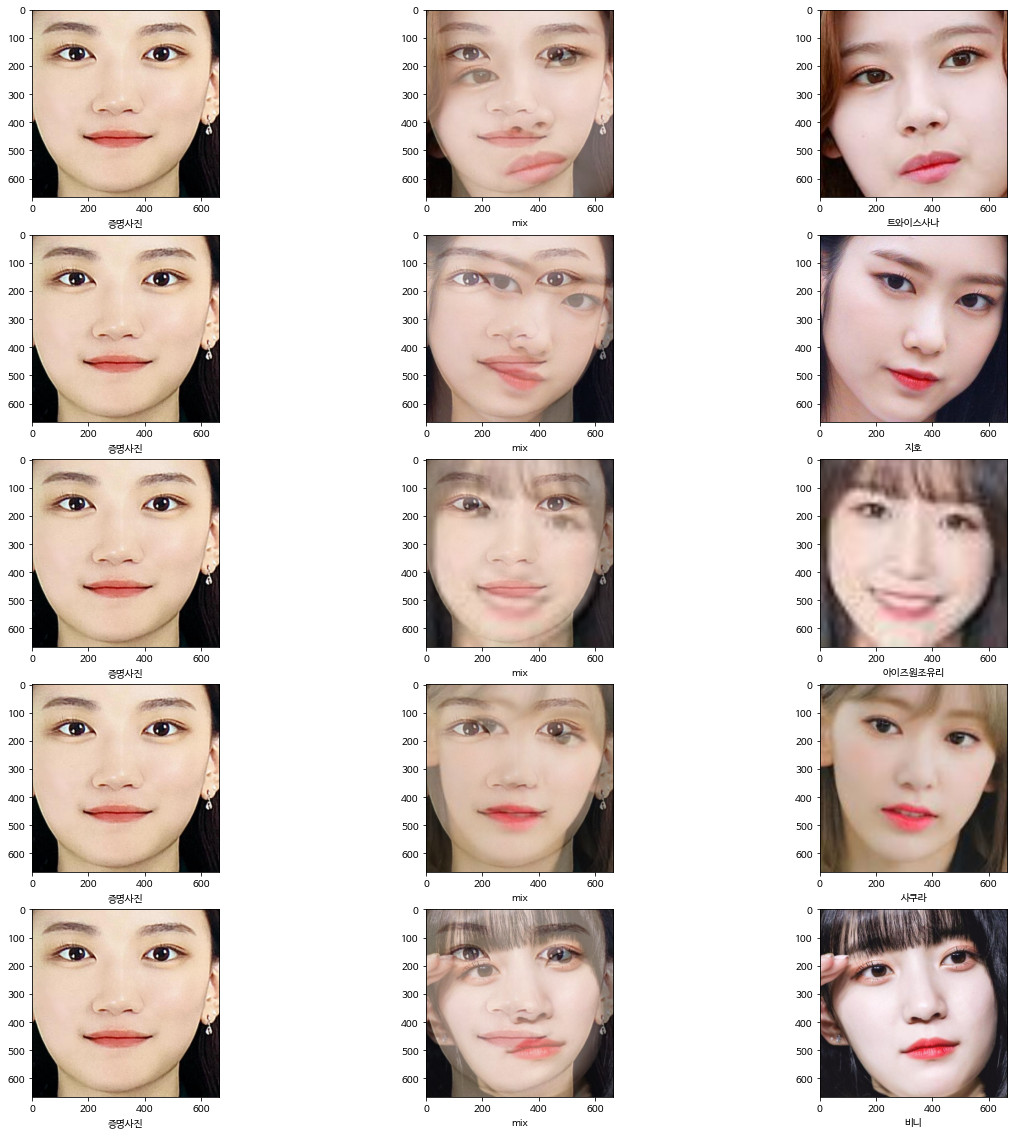

In [28]:
get_nearest_face_images('Ï¶ùÎ™ÖÏÇ¨ÏßÑ', sorted_faces)

In [21]:
sorted_faces, key = get_nearest_face('ÎÇò1', 5)

ÏàúÏúÑ 1 : Ïù¥Î¶Ñ(Ïö∞Í∏∞), Í±∞Î¶¨(0.3466745291531629)
ÏàúÏúÑ 2 : Ïù¥Î¶Ñ(ÏºÄÏù¥), Í±∞Î¶¨(0.34763479215740273)
ÏàúÏúÑ 3 : Ïù¥Î¶Ñ(ÏÇ¨Ïø†Îùº), Í±∞Î¶¨(0.3569498743138895)
ÏàúÏúÑ 4 : Ïù¥Î¶Ñ(ÏïÑÏù¥Ï¶àÏõêÏ°∞Ïú†Î¶¨), Í±∞Î¶¨(0.3665411696508014)
ÏàúÏúÑ 5 : Ïù¥Î¶Ñ(ÎπÑÎãà), Í±∞Î¶¨(0.3871224501388347)


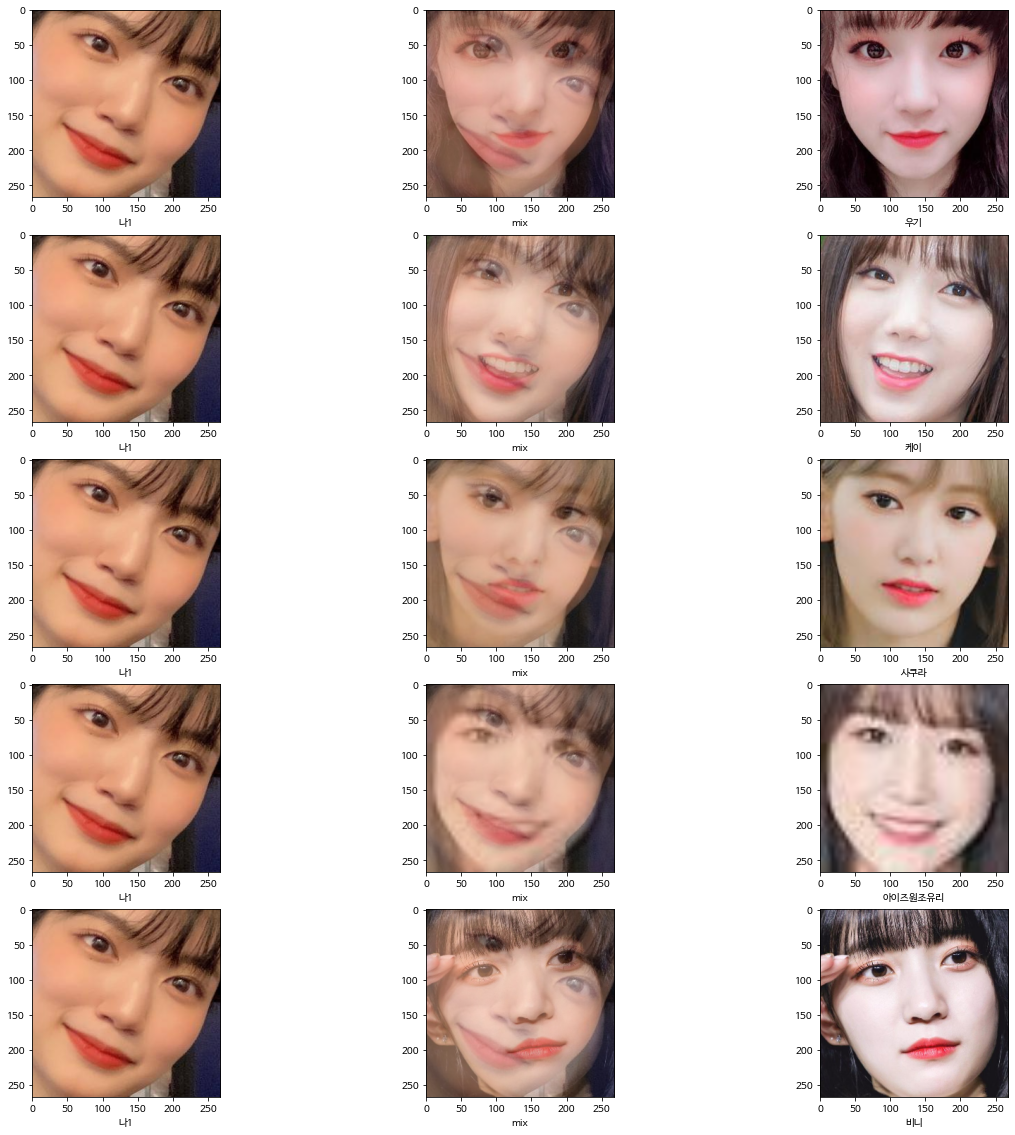

In [22]:
get_nearest_face_images('ÎÇò1', sorted_faces)

ÌóàÌóà ÎØºÎßùÌïòÍ≤å Îã§ ÏïÑÏù¥ÎèåÎ°ú ÎÇòÏôîÎÑ§Ïöî,,, Î®∏Ïì±

In [24]:
sorted_faces, key = get_nearest_face('Î∞ïÎ™ÖÏàò', 5)

ÏàúÏúÑ 1 : Ïù¥Î¶Ñ(Ïù¥ÏäπÏ≤†), Í±∞Î¶¨(0.42375459454988507)
ÏàúÏúÑ 2 : Ïù¥Î¶Ñ(Î∞ïÌúòÏàú), Í±∞Î¶¨(0.42707115998014883)
ÏàúÏúÑ 3 : Ïù¥Î¶Ñ(Î∞ïÍ±¥Ïö∞), Í±∞Î¶¨(0.43777782681515254)
ÏàúÏúÑ 4 : Ïù¥Î¶Ñ(Ï†ïÏàòÎπà), Í±∞Î¶¨(0.44884041106288786)
ÏàúÏúÑ 5 : Ïù¥Î¶Ñ(Î∞ïÌï¥Ïùº), Í±∞Î¶¨(0.45170819165874726)


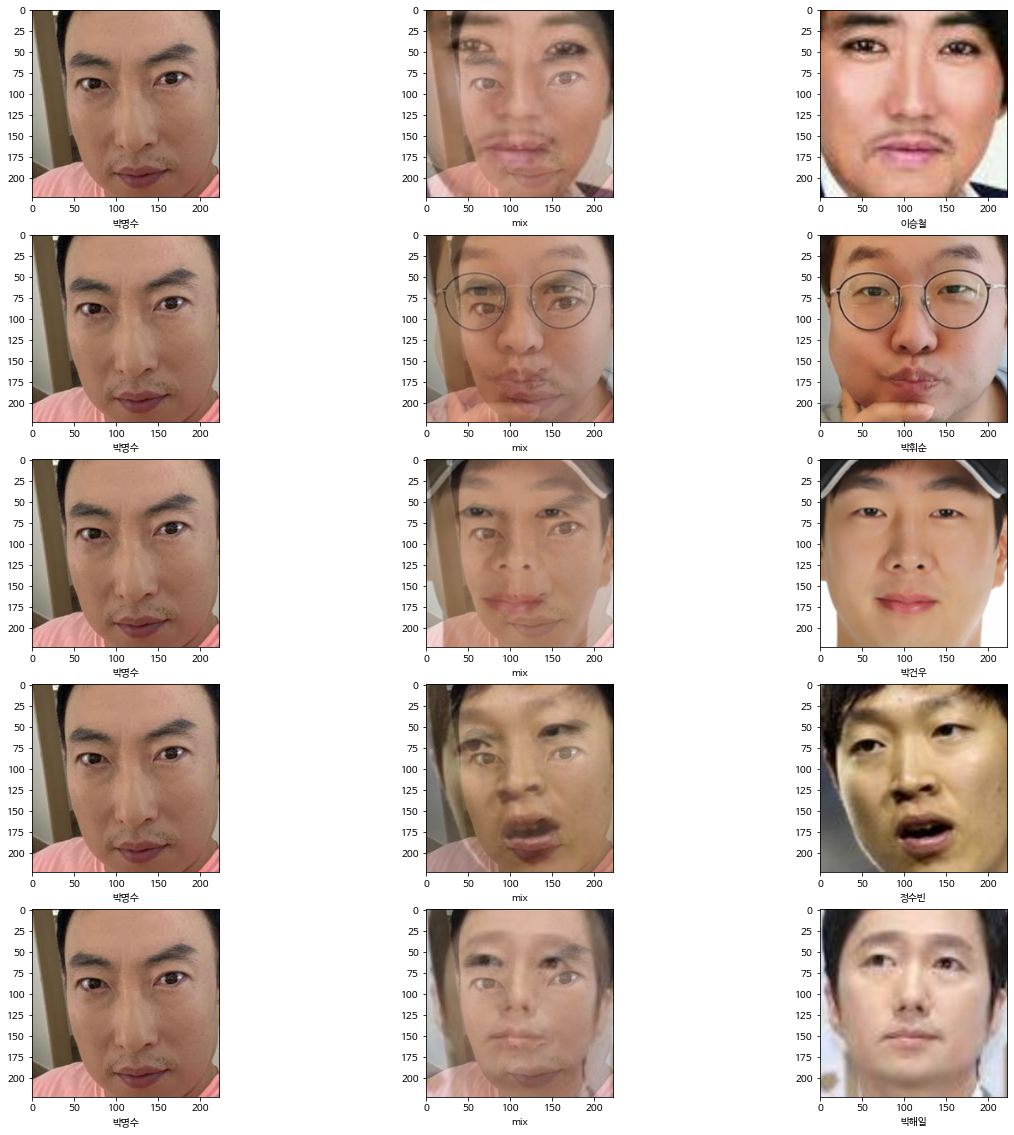

In [25]:
get_nearest_face_images('Î∞ïÎ™ÖÏàò', sorted_faces)

„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„ÖãÏïÑ ÏõÉÍ∏∞ÎÑ§Ïöî 

## ü§îÌöåÍ≥†Î°ùü§î
- NLP ÏûÑÎ≤†Îî©Ìï†ÎïåÎäî Ïûò Ïù¥Ìï¥Í∞Ä ÏïàÎêêÎäîÎç∞ Ïù¥Î≤àÍ∏∞ÌöåÏóê ÏûÑÎ≤†Îî©Ïóê ÎåÄÌï¥ Ï¢Ä Îçî Ïûò Ïù¥Ìï¥Í∞Ä Îêú Í≤É Í∞ôÎã§
- ÎÇ¥ÏÇ¨ÏßÑÎÅºÎ¶¨ Í∞ÄÍπåÏö¥ Í±∞Î¶¨ ÏòÄÏúºÎÇò ÏàúÏúÑ top5ÏóêÎäî Îì§ÏßÄ Î™ªÌïúÍ±∏ Î≥¥ÏïÑ ÏÑ±Îä•Ïù¥ Î≥ÑÎ°ú Ï¢ãÏùÄ Í≤É Í∞ôÏßÄÎäî ÏïäÎã§
- ÏãúÍ∞ÅÌôîÌï†Îïå ÌïúÍ∏ÄÏù¥ Íπ®ÏßÄÎäî ÌòÑÏÉÅÏù¥ Î∞úÏÉùÌñàÎäîÎç∞ ÌòïÏ§ÄÎãò ÎçïÎ∂ÑÏóê Ìï¥Í≤∞ÌñàÎã§!! Í∞êÏÇ¨Ìï©ÎãàÎã§ ÌòïÏ§ÄÎãò